In [1]:
import tensorflow as tf
from tensorflow.python.platform import gfile
import numpy as np
import cv2
from keras import backend as K
import matplotlib.pyplot as plt
sess = K.get_session()
from skimage.io import imshow
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
warnings.filterwarnings('ignore', category=UserWarning, module='numpy')
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

Using TensorFlow backend.


In [2]:
f = gfile.FastGFile("./model/detection.pb", 'rb')
graph_def = tf.GraphDef()
# Parses a serialized binary message into the current message.
graph_def.ParseFromString(f.read())
f.close()

sess.graph.as_default()
# Import a serialized TensorFlow `GraphDef` protocol buffer
# and place into the current default `Graph`.
tf.import_graph_def(graph_def)

Instructions for updating:
Use tf.gfile.GFile.


In [3]:
x = np.zeros((2, 128, 128, 3), dtype=np.uint8)

im1 = cv2.imread('./FLASH/Plants_002_flash.png')[:,:,:3]
img1 = cv2.resize(im1, (128,128),interpolation=cv2.INTER_AREA)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
x[0] = img1
im = cv2.imread('./AMBIENT/Plants_002_ambient.png')[:,:,:3]
img = cv2.resize(im, (128,128),interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
x[1] = img

In [4]:
softmax_tensor = sess.graph.get_tensor_by_name('import/conv2d_19/Sigmoid:0')
predictions = sess.run(softmax_tensor, {'import/input_1:0': x[:2]})

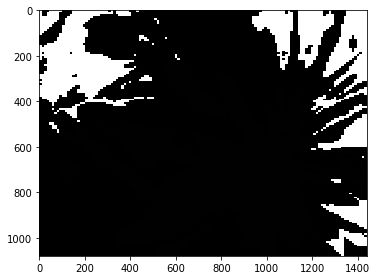

In [5]:
b4 = (predictions>0.5).astype(np.uint8)*255

a=b4[0]-b4[1]
img2=np.zeros_like(img)
img2[:,:,:3]=a
img2[:,:,:1]=a
img2[:,:,:2]=a
img2 = cv2.resize(img2, (im1.shape[1],im1.shape[0]),interpolation=cv2.INTER_NEAREST)
kernal=np.ones((5,5),np.uint8)
img3=cv2.dilate(img2,kernal,iterations=10)
b = cv2.bitwise_not(img3)
imshow(img2)

In [6]:
d = cv2.bitwise_and(im1, b)
a = cv2.bitwise_and(im, img3)

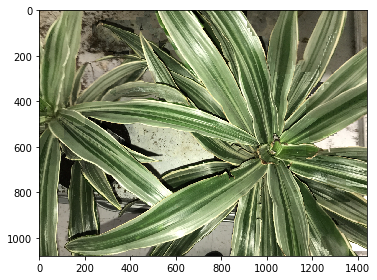

In [7]:
c=cv2.bitwise_or(a,d)
imshow(c)

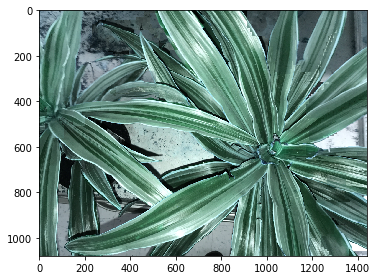

In [21]:
c = cv2.cvtColor(c,cv2.COLOR_RGB2BGR)
cv2.imwrite("qwe/nearest1.png",c)
imshow(c)

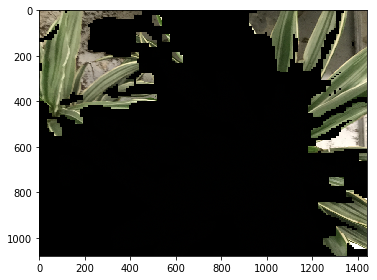

In [106]:
imshow(a)

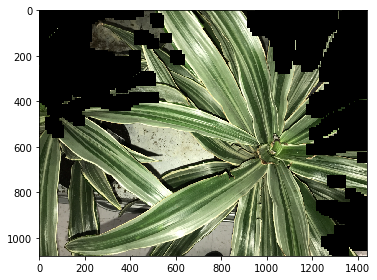

In [32]:
imshow(d)

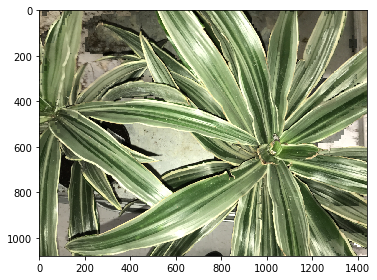

In [12]:
kernal=np.ones((3,3),np.uint8)
img3=cv2.dilate(c,kernal,iterations=1)
imshow(img3)

In [8]:
BLUE = [255,255,255]
ct= cv2.copyMakeBorder(c.copy(),1,1,1,1,cv2.BORDER_CONSTANT,value=BLUE)
ct.shape
#cv2.imwrite("./paddedimg.png",ct)

(1082, 1442, 3)

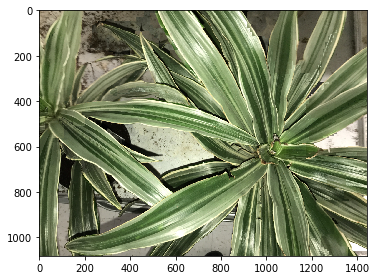

In [43]:
imshow(constant)

In [13]:
cmean=ct.copy()
cmedi=ct.copy()

In [9]:
l=[]
for i in range(1080):
    for j in range(1440):
        if (d[i,j,:]==[0,0,0]).all():
            l.append((i,j))

In [10]:
import statistics as st

True

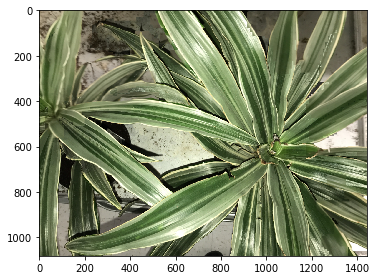

In [14]:
for i in range(len(l)):
    e=l[i][0]
    f=l[i][1]
    m=[ct[e,f,0],ct[e,f+1,0],ct[e,f+2,0],ct[e+1,f,0],ct[e+1,f+1,0],ct[e+1,f+2,0],ct[e+2,f,0],ct[e+2,f+1,0],ct[e+2,f+2,0]]
    n=[ct[e,f,1],ct[e,f+1,1],ct[e,f+2,1],ct[e+1,f,1],ct[e+1,f+1,1],ct[e+1,f+2,1],ct[e+2,f,1],ct[e+2,f+1,1],ct[e+2,f+2,1]]
    o=[ct[e,f,2],ct[e,f+1,2],ct[e,f+2,2],ct[e+1,f,2],ct[e+1,f+1,2],ct[e+1,f+2,2],ct[e+2,f,2],ct[e+2,f+1,2],ct[e+2,f+2,2]]
    cmean[e+1,f+1,0]=st.mean(m)
    cmean[e+1,f+1,1]=st.mean(n)
    cmean[e+1,f+1,2]=st.mean(o)
imshow(cmean)
cv2.imwrite("./cmean.png",cmean)

True

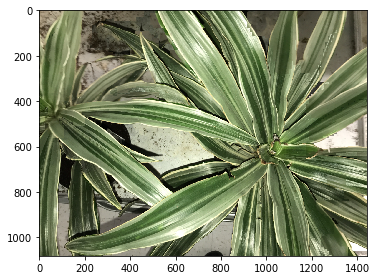

In [17]:
for i in range(len(l)):
    e=l[i][0]
    f=l[i][1]
    m=[ct[e,f,0],ct[e,f+1,0],ct[e,f+2,0],ct[e+1,f,0],ct[e+1,f+1,0],ct[e+1,f+2,0],ct[e+2,f,0],ct[e+2,f+1,0],ct[e+2,f+2,0]]
    n=[ct[e,f,1],ct[e,f+1,1],ct[e,f+2,1],ct[e+1,f,1],ct[e+1,f+1,1],ct[e+1,f+2,1],ct[e+2,f,1],ct[e+2,f+1,1],ct[e+2,f+2,1]]
    o=[ct[e,f,2],ct[e,f+1,2],ct[e,f+2,2],ct[e+1,f,2],ct[e+1,f+1,2],ct[e+1,f+2,2],ct[e+2,f,2],ct[e+2,f+1,2],ct[e+2,f+2,2]]
    cmedi[e+1,f+1,0]=st.median(m)
    cmedi[e+1,f+1,1]=st.median(n)
    cmedi[e+1,f+1,2]=st.median(o)
imshow(cmedi)
cv2.imwrite("./cmedi.png",cmedi)

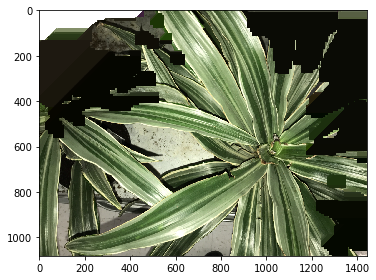

In [59]:
for i in range(len(l)):
    e=l[i][0]
    f=l[i][1]
    m=[ct[e,f,0],ct[e,f+1,0],ct[e,f+2,0],ct[e+1,f,0],ct[e+1,f+1,0],ct[e+1,f+2,0],ct[e+2,f,0],ct[e+2,f+1,0],ct[e+2,f+2,0]]
    n=[ct[e,f,1],ct[e,f+1,1],ct[e,f+2,1],ct[e+1,f,1],ct[e+1,f+1,1],ct[e+1,f+2,1],ct[e+2,f,1],ct[e+2,f+1,1],ct[e+2,f+2,1]]
    o=[ct[e,f,2],ct[e,f+1,2],ct[e,f+2,2],ct[e+1,f,2],ct[e+1,f+1,2],ct[e+1,f+2,2],ct[e+2,f,2],ct[e+2,f+1,2],ct[e+2,f+2,2]]
    ct[e+1,f+1,0]=min(m)
    ct[e+1,f+1,1]=min(n)
    ct[e+1,f+1,2]=min(o)
imshow(ct)

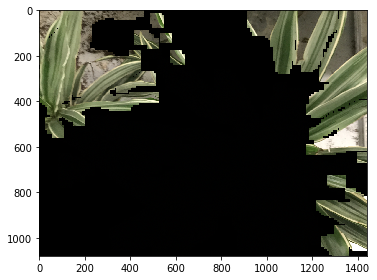

In [70]:
imshow(a)

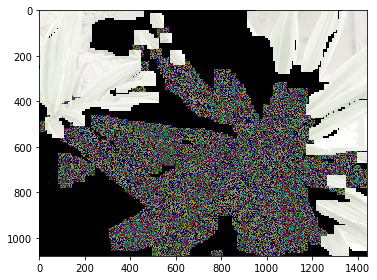

In [69]:
z = np.array(255*(a / 255) ** 0.1, dtype = 'uint8')
imshow(z)

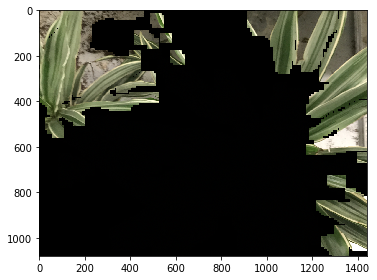

In [71]:
for i in range(1080):
    for j in range(1440):
        if (a[i,j,:]==[0,0,0]).all():
            a[i,j,0]=255*(a[i,j,0] / 255) ** 0.1
            a[i,j,1]=255*(a[i,j,1] / 255) ** 0.1
            a[i,j,2]=255*(a[i,j,2] / 255) ** 0.1
imshow(a)

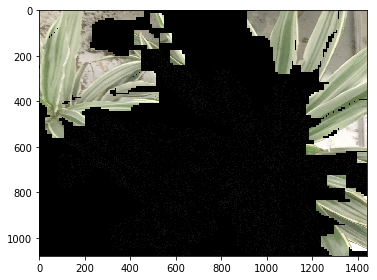

In [74]:
for i in range(1080):
    for j in range(1440):
        if (a[i,j,:]!=[0,0,0]).all():
            a[i,j,0]=255*(a[i,j,0] / 255) ** 0.5
            a[i,j,1]=255*(a[i,j,1] / 255) ** 0.5
            a[i,j,2]=255*(a[i,j,2] / 255) ** 0.5
imshow(a)

In [19]:
import math

In [20]:
k=0
g=[]
for i in range(1080):
    for j in range(1440):
        if (d[i,j,0]==[0,0,0]).all() and (d[i,j,2]==[0,0,0]).all() and (d[i,j,1]==[0,0,0]).all():
            x=math.log(im1[i,j,0]+2)/math.log(im[i,j,0]+2)
            y=math.log(im1[i,j,1]+2)/math.log(im[i,j,1]+2)
            z=math.log(im1[i,j,2]+2)/math.log(im[i,j,2]+2)
            g.append([x,y,z])
len(g)

457617

In [22]:
len(n)

457617

In [21]:
n=[]
for i in range(len(g)):
    n.append(st.mean(g[i]))

In [23]:
st.mean(n)

0.9089276921252459

In [26]:
a1=im1.copy()
b1=im1.copy()
c1=im1.copy()

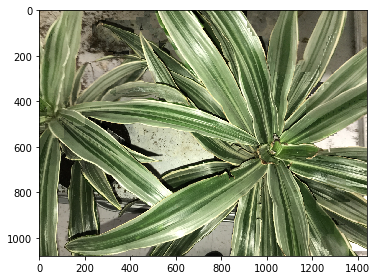

In [27]:
for i in range(1080):
    for j in range(1440):
        if (d[i,j,0]==[0,0,0]).all() and (d[i,j,2]==[0,0,0]).all() and (d[i,j,1]==[0,0,0]).all():
            a1[i,j,:]=255*(im[i,j,:] / 255) ** 0.9089276921252459
imshow(a1)

714256


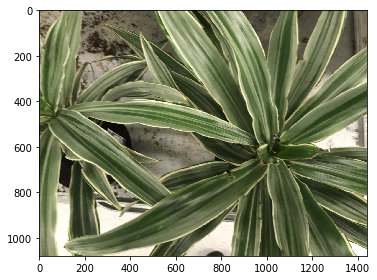

In [103]:
k=0
for i in range(1080):
    for j in range(1440):
        if (im1[i,j,:]<im[i,j,:]).any():
            b1[i,j,:]=im[i,j,:]
            k+=1
print(k)
imshow(b1)

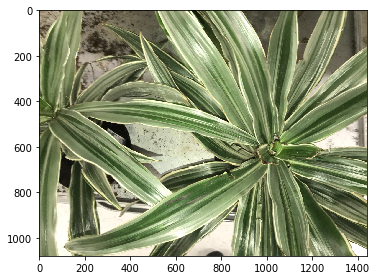

In [96]:
imshow(im1)

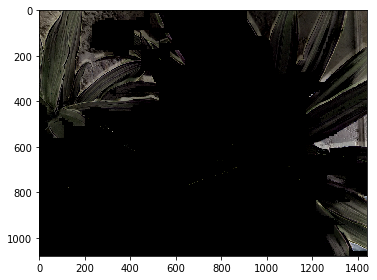

In [28]:
dd=cv2.subtract(a1,im1)
imshow(dd)

In [136]:
k=0
for i in range(1080):
    for j in range(1440):
        if (im1[i,j,:]==a1[i,j,:]).all():
            k+=1
k

1555200

In [137]:
hsv=cv2.cvtColor(img1,cv2.COLOR_RGB2HSV)

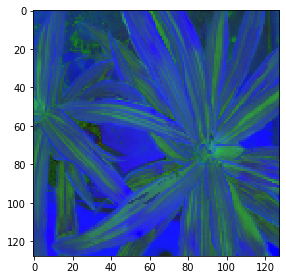

In [138]:
imshow(hsv)

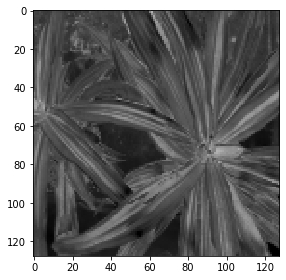

In [139]:
imshow(hsv[:,:,1])

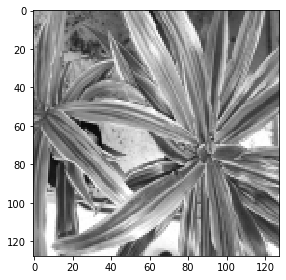

In [142]:
imshow(hsv[:,:,2])

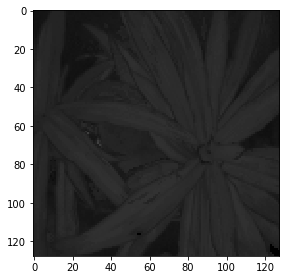

In [143]:
imshow(hsv[:,:,0])

In [12]:
cmean

NameError: name 'cmean' is not defined